In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Cleaning and EDA


Before diving into the analysis, the dataset needed cleaning to ensure its accuracy and reliability. The first step involved handling missing values, particularly in key fields such as job title and description. Any listings that lacked this critical information were removed, while other categorical fields such as industry and employment type were filled with the placeholder “Unknown” to maintain consistency. Text fields like company profile, requirements, and benefits, which often contained missing values, were replaced with "Not Provided" to preserve completeness.


In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

In [3]:
df=pd.read_csv(r"/content/drive/MyDrive/ds project/jobs_cleaned.csv")
df.head()

,telecommuting,fraudulent,ratio,text,character_count
0,False,False,0.03,"marketing intern us, ny, new york were food52,...",2691
1,False,False,0.00,"customer service - cloud video production nz, ...",6152
2,False,False,0.00,"commissioning machinery assistant (cma) us, ia...",2652
3,False,False,0.05,"account executive - washington dc us, dc, wash...",5506
4,False,False,0.00,"bill review manager us, fl, fort worth spotsou...",4008


In [4]:
X = df[['telecommuting', 'ratio', 'text', 'character_count']]
y = df['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)
X_train_numeric = X_train[['telecommuting', 'ratio', 'character_count']]
X_test_numeric = X_test[['telecommuting', 'ratio', 'character_count']]

In [5]:
count_vectorizer = CountVectorizer(stop_words='english')
text_train = count_vectorizer.fit_transform(X_train.text.values)
text_test = count_vectorizer.transform(X_test.text.values)

In [14]:
from sklearn.linear_model import SGDClassifier

clf_log = SGDClassifier(loss='log_loss').fit(text_train, y_train)
pred_log = clf_log.predict(text_test)
print("SGD accuracy on text features", metrics.accuracy_score(y_test, pred_log))
print("SGD f1 score on text features", metrics.f1_score(y_test, pred_log))
print("SGD precision on text features", metrics.precision_score(y_test, pred_log))
print("SGD recall on text features", metrics.recall_score(y_test, pred_log))

clf_num = SGDClassifier(loss='log_loss').fit(X_train_numeric, y_train)
pred_num = clf_num.predict(X_test_numeric)
print("\nSGD accuracy on numeric features", metrics.accuracy_score(y_test, pred_num))
print("SGD f1 score on numeric features", metrics.f1_score(y_test, pred_num))
print("SGD precision on numeric features", metrics.precision_score(y_test, pred_num))
print("SGD recall on numeric features", metrics.recall_score(y_test, pred_num))

SGD accuracy on text features 0.9874202693125443
SGD f1 score on text features 0.7953890489913544
SGD precision on text features 0.8961038961038961
SGD recall on text features 0.7150259067357513

SGD accuracy on numeric features 0.9658043940467753
SGD f1 score on numeric features 0.0
SGD precision on numeric features 0.0
SGD recall on numeric features 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

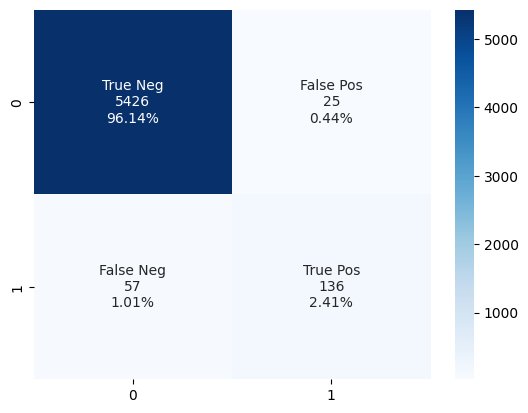

In [9]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, pred_log)
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
yo

In [13]:
from gpt4all import Embed4All
import torch
import torch.nn as nn
import torch.nn.functional as F
import re
import inflect

In [14]:
feature_extractor = Embed4All()

train_texts = X_train['text'].values
val_texts = X_test['text'].values

train_embeddings = []
val_embeddings = []

count=0
# Training sample embeddings
for text in train_texts:
  embeddings = feature_extractor.embed(text)
  train_embeddings.append(embeddings)
  count+=1
  if count%1000==0:
    print(count)

# Validation sample embeddings
for text in val_texts:
    embeddings_val = feature_extractor.embed(text)
    val_embeddings.append(embeddings_val)

# Convert labels to tensor
train_labels = torch.tensor(y_train.values)
val_labels = torch.tensor(y_test.values)



Downloading: 100%|██████████| 45.9M/45.9M [00:00<00:00, 80.0MiB/s]
Verifying: 100%|██████████| 45.9M/45.9M [00:00<00:00, 560MiB/s]


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


In [15]:
print(train_labels.shape)
print(val_labels.shape)
print(train_embeddings[:5])
print(val_embeddings[:5])

torch.Size([11458])
torch.Size([5644])
[[-0.029285259544849396, -0.02064445987343788, -0.018705042079091072, -0.016481081023812294, -0.10712459683418274, 0.05292040854692459, 0.020922411233186722, 0.043292563408613205, -0.09073556214570999, -0.013271255418658257, -0.04501045495271683, -0.0646730363368988, 0.035408589988946915, 0.02799197845160961, 0.08635234087705612, 0.04187116399407387, 0.06464831531047821, -0.06915651261806488, -0.06895775347948074, -0.08499922603368759, -0.017869608476758003, -0.09914872795343399, -0.013337422162294388, -0.0840916559100151, -0.008157394826412201, -0.015789823606610298, 0.015420706011354923, -0.023967325687408447, -0.04686256870627403, -0.06442971527576447, 0.05451276898384094, 0.10083385556936264, 0.010453240014612675, 0.03354783356189728, -0.0007749904762022197, 0.06502459198236465, -0.041356779634952545, -0.026645168662071228, 0.06578720360994339, -0.006479504983872175, -0.0532824732363224, -0.07084079086780548, -0.0896790623664856, -0.0050726211

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# emb3ddings to pytorch tensors:
train_embeddings_tensor = torch.tensor(train_embeddings)
val_embeddings_tensor = torch.tensor(val_embeddings)

# dataloader for training and validation:
batch_size = 32
train_dataset = TensorDataset(train_embeddings_tensor, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(val_embeddings_tensor, val_labels)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [23]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        output = self.fc(hn.squeeze(0))
        return output


In [24]:
# Initialize the LSTM model, loss function, and optimizer
input_size = train_embeddings_tensor.size(-1)
hidden_size = 64
output_size = 1  # binary classification
lstm_model = LSTMModel(input_size, hidden_size, output_size)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

In [25]:
epochs = 60
losshistory=[]
for epoch in range(epochs):
    lstm_model.train()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        # outputs = lstm_model(inputs.float())
        outputs = lstm_model(inputs.unsqueeze(1).float())
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()
        # total loss:
        total_loss += loss.item()
        # accuracy
        predictions = torch.sigmoid(outputs.squeeze())
        predicted_labels = (predictions > 0.5).float()
        correct_predictions += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)

    # average loss and accuracy
    average_loss = total_loss / len(train_dataloader)
    losshistory.append(average_loss)
    accuracy = correct_predictions / total_samples

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}')




Epoch [1/60], Loss: 0.1839, Accuracy: 0.9688
Epoch [2/60], Loss: 0.1169, Accuracy: 0.9688
Epoch [3/60], Loss: 0.1001, Accuracy: 0.9708
Epoch [4/60], Loss: 0.0901, Accuracy: 0.9728
Epoch [5/60], Loss: 0.0845, Accuracy: 0.9750
Epoch [6/60], Loss: 0.0796, Accuracy: 0.9759
Epoch [7/60], Loss: 0.0767, Accuracy: 0.9774
Epoch [8/60], Loss: 0.0740, Accuracy: 0.9777
Epoch [9/60], Loss: 0.0714, Accuracy: 0.9784
Epoch [10/60], Loss: 0.0690, Accuracy: 0.9788
Epoch [11/60], Loss: 0.0659, Accuracy: 0.9807
Epoch [12/60], Loss: 0.0640, Accuracy: 0.9797
Epoch [13/60], Loss: 0.0617, Accuracy: 0.9809
Epoch [14/60], Loss: 0.0588, Accuracy: 0.9814
Epoch [15/60], Loss: 0.0578, Accuracy: 0.9823
Epoch [16/60], Loss: 0.0559, Accuracy: 0.9821
Epoch [17/60], Loss: 0.0534, Accuracy: 0.9846
Epoch [18/60], Loss: 0.0514, Accuracy: 0.9846
Epoch [19/60], Loss: 0.0497, Accuracy: 0.9855
Epoch [20/60], Loss: 0.0492, Accuracy: 0.9851
Epoch [21/60], Loss: 0.0464, Accuracy: 0.9862
Epoch [22/60], Loss: 0.0450, Accuracy: 0.98

TypeError: iteration over a 0-d array

In [26]:
# evaluation on the validation dataset
lstm_model.eval()
val_predictions = []
with torch.no_grad():
    for inputs, labels in val_dataloader:
        # outputs = lstm_model(inputs.float())
        outputs = lstm_model(inputs.unsqueeze(1).float())
        predictions = torch.sigmoid(outputs.squeeze())
        val_predictions.extend(predictions.numpy())

In [27]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# validation predictions to binary predictions:
val_predictions_binary = (np.array(val_predictions) > 0.5).astype(int)

# validation labels to numpy arrays
val_labels_numpy = val_labels.numpy()

# accuracy
accuracy = np.sum(val_predictions_binary == val_labels_numpy) / len(val_labels_numpy)

# precision, recall, and f1 score
precision = precision_score(val_labels_numpy, val_predictions_binary)
recall = recall_score(val_labels_numpy, val_predictions_binary)
f1 = f1_score(val_labels_numpy, val_predictions_binary)

print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Validation Accuracy: 0.9833
Precision: 0.8511
Recall: 0.6218
F1 Score: 0.7186
